In [21]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd586cd69-4c7c-4ce1-89da-5e9606eb308f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [22]:
type(data)

dict

In [23]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [24]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\TOSHIBA\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906137e+07,1.906137e+07,NaN,1,NaN,NaN,2022-06-08T05:59:00.000Z,30506.109229,3.981116e+10,10.5520,0.802791,3.188995,-3.443689,-9.012250,-28.393566,-22.283444,5.814882e+11,46.5648,6.406283e+11,2022-06-08T05:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 06:00:16.497028
1,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.210911e+08,1.210911e+08,NaN,2,NaN,NaN,2022-06-08T05:58:00.000Z,1809.312032,2.198839e+10,7.8715,1.119706,2.880525,-6.295458,-26.011762,-43.825294,-30.229085,2.190915e+11,17.5453,2.190915e+11,2022-06-08T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 06:00:16.497028
2,825,Tether,USDT,tether,34418,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.242055e+10,7.971362e+10,NaN,3,NaN,NaN,2022-06-08T05:58:00.000Z,0.999352,6.487438e+10,8.8850,0.001042,-0.010596,0.004018,-0.053312,-0.105207,-0.099147,7.237359e+10,5.7942,7.966193e+10,2022-06-08T05:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-08 06:00:16.497028
3,3408,USD Coin,USDC,usd-coin,4314,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.384674e+10,5.384674e+10,NaN,4,NaN,NaN,2022-06-08T05:58:00.000Z,1.000446,5.462739e+09,8.3578,0.024919,0.026592,0.039890,0.043185,0.053726,0.045225,5.387074e+10,4.3129,5.387074e+10,2022-06-08T05:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-08 06:00:16.497028
4,1839,BNB,BNB,bnb,942,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-08T05:58:00.000Z,289.877599,1.543680e+09,-10.8556,0.680247,2.703814,-8.932391,-16.266549,-31.779631,-22.768817,4.733034e+10,3.7893,4.786365e+10,2022-06-08T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 06:00:16.497028
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.393405e+10,3.427770e+10,NaN,6,NaN,NaN,2022-06-08T05:58:00.000Z,0.645594,1.654020e+09,20.1406,0.829937,9.997220,7.538857,-8.364411,-37.687261,-19.656391,2.190762e+10,1.7539,2.905174e+10,2022-06-08T05:58:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-08 06:00:16.497028
6,52,XRP,XRP,xrp,736,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,2022-06-08T05:59:00.000Z,0.400546,1.561311e+09,9.2870,0.317760,2.346024,-4.459980,-29.102528,-47.693416,-45.413167,1.936365e+10,1.5502,4.005462e+10,2022-06-08T05:59:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-08 06:00:16.497028
7,4687,Binance USD,BUSD,binance-usd,3813,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.801362e+10,1.801362e+10,NaN,8,NaN,NaN,2022-06-08T05:59:00.000Z,0.999863,6.417208e+09,19.9002,-0.137420,-0.025902,-0.154241,0.004451,0.049590,0.012078,1.801116e+10,1.4423,1.801116e+10,2022-06-08T05:59:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-08 06:00:16.497028
8,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.404490e+08,5.116169e+08,NaN,9,NaN,NaN,2022-06-08T05:58:00.000Z

In [48]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'd586cd69-4c7c-4ce1-89da-5e9606eb308f',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df
    if not os.path.isfile(r'C:\Users\TOSHIBA\Documents\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\TOSHIBA\Documents\Python Scripts\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\TOSHIBA\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: 
        df = pd.read_csv(r'C:\Users\TOSHIBA\Documents\Python Scripts\API.csv')



In [49]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()  

C:\Users\TOSHIBA\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_4396\1523239598.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [50]:
df72 = pd.read_csv(r'C:\Users\TOSHIBA\Documents\Python Scripts\API.csv')
df72

,Unnamed: 0.1,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,0.0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.906137e+07,1.906137e+07,NaN,1,NaN,NaN,2022-06-08T05:59:00.000Z,30506.109229,3.981116e+10,10.5520,0.802791,3.188995,-3.443689,-9.012250,-28.393566,-22.283444,5.814882e+11,46.5648,6.406283e+11,2022-06-08T05:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 06:00:16.497028
1,1,1.0,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,1.210911e+08,1.210911e+08,NaN,2,NaN,NaN,2022-06-08T05:58:00.000Z,1809.312032,2.198839e+10,7.8715,1.119706,2.880525,-6.295458,-26.011762,-43.825294,-30.229085,2.190915e+11,17.5453,2.190915e+11,2022-06-08T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 06:00:16.497028
2,2,2.0,825,Tether,USDT,tether,34418,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,7.242055e+10,7.971362e+10,NaN,3,NaN,NaN,2022-06-08T05:58:00.000Z,0.999352,6.487438e+10,8.8850,0.001042,-0.010596,0.004018,-0.053312,-0.105207,-0.099147,7.237359e+10,5.7942,7.966193e+10,2022-06-08T05:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-08 06:00:16.497028
3,3,3.0,3408,USD Coin,USDC,usd-coin,4314,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.384674e+10,5.384674e+10,NaN,4,NaN,NaN,2022-06-08T05:58:00.000Z,1.000446,5.462739e+09,8.3578,0.024919,0.026592,0.039890,0.043185,0.053726,0.045225,5.387074e+10,4.3129,5.387074e+10,2022-06-08T05:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-08 06:00:16.497028
4,4,4.0,1839,BNB,BNB,bnb,942,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-08T05:58:00.000Z,289.877599,1.543680e+09,-10.8556,0.680247,2.703814,-8.932391,-16.266549,-31.779631,-22.768817,4.733034e+10,3.7893,4.786365e+10,2022-06-08T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 06:00:16.497028
5,5,5.0,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"['mineable', 'dpos', 'pos', 'platform', 'resea...",4.500000e+10,3.393405e+10,3.427770e+10,NaN,6,NaN,NaN,2022-06-08T05:58:00.000Z,0.645594,1.654020e+09,20.1406,0.829937,9.997220,7.538857,-8.364411,-37.687261,-19.656391,2.190762e+10,1.7539,2.905174e+10,2022-06-08T05:58:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-08 06:00:16.497028
6,6,6.0,52,XRP,XRP,xrp,736,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,2022-06-08T05:59:00.000Z,0.400546,1.561311e+09,9.2870,0.317760,2.346024,-4.459980,-29.102528,-47.693416,-45.413167,1.936365e+10,1.5502,4.005462e+10,2022-06-08T05:59:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-08 06:00:16.497028
7,7,7.0,4687,Binance USD,BUSD,binance-usd,3813,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,1.801362e+10,1.801362e+10,NaN,8,NaN,NaN,2022-06-08T05:59:00.000Z,0.999863,6.417208e+09,19.9002,-0.137420,-0.025902,-0.154241,0.004451,0.049590,0.012078,1.801116e+10,1.4423,1.801116e+10,2022-06-08T05:59:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-08 06:00:16.497028
8,8,8.0,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', '

In [30]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906137e+07,1.906137e+07,NaN,1,NaN,NaN,2022-06-08T05:59:00.000Z,30506.109229,3.981116e+10,10.5520,0.802791,3.188995,-3.443689,-9.012250,-28.393566,-22.283444,5.814882e+11,46.5648,6.406283e+11,2022-06-08T05:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 06:00:16.497028,NaT
1,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.210911e+08,1.210911e+08,NaN,2,NaN,NaN,2022-06-08T05:58:00.000Z,1809.312032,2.198839e+10,7.8715,1.119706,2.880525,-6.295458,-26.011762,-43.825294,-30.229085,2.190915e+11,17.5453,2.190915e+11,2022-06-08T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 06:00:16.497028,NaT
2,825,Tether,USDT,tether,34418,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.242055e+10,7.971362e+10,NaN,3,NaN,NaN,2022-06-08T05:58:00.000Z,0.999352,6.487438e+10,8.8850,0.001042,-0.010596,0.004018,-0.053312,-0.105207,-0.099147,7.237359e+10,5.7942,7.966193e+10,2022-06-08T05:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-08 06:00:16.497028,NaT
3,3408,USD Coin,USDC,usd-coin,4314,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.384674e+10,5.384674e+10,NaN,4,NaN,NaN,2022-06-08T05:58:00.000Z,1.000446,5.462739e+09,8.3578,0.024919,0.026592,0.039890,0.043185,0.053726,0.045225,5.387074e+10,4.3129,5.387074e+10,2022-06-08T05:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-08 06:00:16.497028,NaT
4,1839,BNB,BNB,bnb,942,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-08T05:58:00.000Z,289.877599,1.543680e+09,-10.8556,0.680247,2.703814,-8.932391,-16.266549,-31.779631,-22.768817,4.733034e+10,3.7893,4.786365e+10,2022-06-08T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 06:00:16.497028,NaT
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.393405e+10,3.427770e+10,NaN,6,NaN,NaN,2022-06-08T05:58:00.000Z,0.645594,1.654020e+09,20.1406,0.829937,9.997220,7.538857,-8.364411,-37.687261,-19.656391,2.190762e+10,1.7539,2.905174e+10,2022-06-08T05:58:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-08 06:00:16.497028,NaT
6,52,XRP,XRP,xrp,736,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,2022-06-08T05:59:00.000Z,0.400546,1.561311e+09,9.2870,0.317760,2.346024,-4.459980,-29.102528,-47.693416,-45.413167,1.936365e+10,1.5502,4.005462e+10,2022-06-08T05:59:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-08 06:00:16.497028,NaT
7,4687,Binance USD,BUSD,binance-usd,3813,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.801362e+10,1.801362e+10,NaN,8,NaN,NaN,2022-06-08T05:59:00.000Z,0.999863,6.417208e+09,19.9002,-0.137420,-0.025902,-0.154241,0.004451,0.049590,0.012078,1.801116e+10,1.4423,1.801116e+10,2022-06-08T05:59:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-08 06:00:16.497028,NaT
8,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.404490e+08,5.116169e

In [31]:
df = df.drop('Timestamp', 1)

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_4396\1727873614.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Timestamp', 1)


In [32]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906137e+07,1.906137e+07,NaN,1,NaN,NaN,2022-06-08T05:59:00.000Z,30506.109229,3.981116e+10,10.5520,0.802791,3.188995,-3.443689,-9.012250,-28.393566,-22.283444,5.814882e+11,46.5648,6.406283e+11,2022-06-08T05:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 06:00:16.497028
1,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.210911e+08,1.210911e+08,NaN,2,NaN,NaN,2022-06-08T05:58:00.000Z,1809.312032,2.198839e+10,7.8715,1.119706,2.880525,-6.295458,-26.011762,-43.825294,-30.229085,2.190915e+11,17.5453,2.190915e+11,2022-06-08T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 06:00:16.497028
2,825,Tether,USDT,tether,34418,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.242055e+10,7.971362e+10,NaN,3,NaN,NaN,2022-06-08T05:58:00.000Z,0.999352,6.487438e+10,8.8850,0.001042,-0.010596,0.004018,-0.053312,-0.105207,-0.099147,7.237359e+10,5.7942,7.966193e+10,2022-06-08T05:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-08 06:00:16.497028
3,3408,USD Coin,USDC,usd-coin,4314,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.384674e+10,5.384674e+10,NaN,4,NaN,NaN,2022-06-08T05:58:00.000Z,1.000446,5.462739e+09,8.3578,0.024919,0.026592,0.039890,0.043185,0.053726,0.045225,5.387074e+10,4.3129,5.387074e+10,2022-06-08T05:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-08 06:00:16.497028
4,1839,BNB,BNB,bnb,942,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-08T05:58:00.000Z,289.877599,1.543680e+09,-10.8556,0.680247,2.703814,-8.932391,-16.266549,-31.779631,-22.768817,4.733034e+10,3.7893,4.786365e+10,2022-06-08T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 06:00:16.497028
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.393405e+10,3.427770e+10,NaN,6,NaN,NaN,2022-06-08T05:58:00.000Z,0.645594,1.654020e+09,20.1406,0.829937,9.997220,7.538857,-8.364411,-37.687261,-19.656391,2.190762e+10,1.7539,2.905174e+10,2022-06-08T05:58:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-08 06:00:16.497028
6,52,XRP,XRP,xrp,736,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,2022-06-08T05:59:00.000Z,0.400546,1.561311e+09,9.2870,0.317760,2.346024,-4.459980,-29.102528,-47.693416,-45.413167,1.936365e+10,1.5502,4.005462e+10,2022-06-08T05:59:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-08 06:00:16.497028
7,4687,Binance USD,BUSD,binance-usd,3813,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.801362e+10,1.801362e+10,NaN,8,NaN,NaN,2022-06-08T05:59:00.000Z,0.999863,6.417208e+09,19.9002,-0.137420,-0.025902,-0.154241,0.004451,0.049590,0.012078,1.801116e+10,1.4423,1.801116e+10,2022-06-08T05:59:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-08 06:00:16.497028
8,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.404490e+08,5.116169e+08,NaN,9,NaN,NaN,2022-06-08T05:58:00.000Z

In [33]:
df = df.dropna(axis=0, subset=['timestamp'])

In [34]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906137e+07,1.906137e+07,NaN,1,NaN,NaN,2022-06-08T05:59:00.000Z,30506.109229,3.981116e+10,10.5520,0.802791,3.188995,-3.443689,-9.012250,-28.393566,-22.283444,5.814882e+11,46.5648,6.406283e+11,2022-06-08T05:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 06:00:16.497028
1,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.210911e+08,1.210911e+08,NaN,2,NaN,NaN,2022-06-08T05:58:00.000Z,1809.312032,2.198839e+10,7.8715,1.119706,2.880525,-6.295458,-26.011762,-43.825294,-30.229085,2.190915e+11,17.5453,2.190915e+11,2022-06-08T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 06:00:16.497028
2,825,Tether,USDT,tether,34418,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.242055e+10,7.971362e+10,NaN,3,NaN,NaN,2022-06-08T05:58:00.000Z,0.999352,6.487438e+10,8.8850,0.001042,-0.010596,0.004018,-0.053312,-0.105207,-0.099147,7.237359e+10,5.7942,7.966193e+10,2022-06-08T05:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-08 06:00:16.497028
3,3408,USD Coin,USDC,usd-coin,4314,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.384674e+10,5.384674e+10,NaN,4,NaN,NaN,2022-06-08T05:58:00.000Z,1.000446,5.462739e+09,8.3578,0.024919,0.026592,0.039890,0.043185,0.053726,0.045225,5.387074e+10,4.3129,5.387074e+10,2022-06-08T05:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-08 06:00:16.497028
4,1839,BNB,BNB,bnb,942,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-08T05:58:00.000Z,289.877599,1.543680e+09,-10.8556,0.680247,2.703814,-8.932391,-16.266549,-31.779631,-22.768817,4.733034e+10,3.7893,4.786365e+10,2022-06-08T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 06:00:16.497028
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.393405e+10,3.427770e+10,NaN,6,NaN,NaN,2022-06-08T05:58:00.000Z,0.645594,1.654020e+09,20.1406,0.829937,9.997220,7.538857,-8.364411,-37.687261,-19.656391,2.190762e+10,1.7539,2.905174e+10,2022-06-08T05:58:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-08 06:00:16.497028
6,52,XRP,XRP,xrp,736,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,2022-06-08T05:59:00.000Z,0.400546,1.561311e+09,9.2870,0.317760,2.346024,-4.459980,-29.102528,-47.693416,-45.413167,1.936365e+10,1.5502,4.005462e+10,2022-06-08T05:59:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-08 06:00:16.497028
7,4687,Binance USD,BUSD,binance-usd,3813,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.801362e+10,1.801362e+10,NaN,8,NaN,NaN,2022-06-08T05:59:00.000Z,0.999863,6.417208e+09,19.9002,-0.137420,-0.025902,-0.154241,0.004451,0.049590,0.012078,1.801116e+10,1.4423,1.801116e+10,2022-06-08T05:59:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-08 06:00:16.497028
8,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.404490e+08,5.116169e+08,NaN,9,NaN,NaN,2022-06-08T05:58:00.000Z

In [51]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [52]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0.00000,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19061368.00000,19061368.00000,NaN,1,NaN,NaN,2022-06-08T05:59:00.000Z,30506.10923,39811162496.35111,10.55200,0.80279,3.18900,-3.44369,-9.01225,-28.39357,-22.28344,581488174262.38721,46.56480,640628293809.23999,2022-06-08T05:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 06:00:16.497028
1,1.00000,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,121091059.56150,121091059.56150,NaN,2,NaN,NaN,2022-06-08T05:58:00.000Z,1809.31203,21988388299.06053,7.87150,1.11971,2.88053,-6.29546,-26.01176,-43.82529,-30.22909,219091511047.43411,17.54530,219091511047.42999,2022-06-08T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 06:00:16.497028
2,2.00000,825,Tether,USDT,tether,34418,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,72420549552.67801,79713622660.21223,NaN,3,NaN,NaN,2022-06-08T05:58:00.000Z,0.99935,64874377123.27877,8.88500,0.00104,-0.01060,0.00402,-0.05331,-0.10521,-0.09915,72373589850.98439,5.79420,79661933906.62000,2022-06-08T05:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-08 06:00:16.497028
3,3.00000,3408,USD Coin,USDC,usd-coin,4314,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,53846740137.39527,53846740137.39527,NaN,4,NaN,NaN,2022-06-08T05:58:00.000Z,1.00045,5462738698.72050,8.35780,0.02492,0.02659,0.03989,0.04318,0.05373,0.04523,53870744884.59475,4.31290,53870744884.59000,2022-06-08T05:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-08 06:00:16.497028
4,4.00000,1839,BNB,BNB,bnb,942,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,2022-06-08T05:58:00.000Z,289.87760,1543680144.43899,-10.85560,0.68025,2.70381,-8.93239,-16.26655,-31.77963,-22.76882,47330337418.46304,3.78930,47863649984.65000,2022-06-08T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 06:00:16.497028
5,5.00000,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"['mineable', 'dpos', 'pos', 'platform', 'resea...",45000000000.00000,33934048405.59300,34277702081.60500,NaN,6,NaN,NaN,2022-06-08T05:58:00.000Z,0.64559,1654020199.30909,20.14060,0.82994,9.99722,7.53886,-8.36441,-37.68726,-19.65639,21907622569.79152,1.75390,29051735998.53000,2022-06-08T05:58:00.000Z,1839.00000,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-08 06:00:16.497028
6,6.00000,52,XRP,XRP,xrp,736,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,2022-06-08T05:59:00.000Z,0.40055,1561310607.96242,9.28700,0.31776,2.34602,-4.45998,-29.10253,-47.69342,-45.41317,19363645289.80428,1.55020,40054619605.18000,2022-06-08T05:59:00.000Z,1839.00000,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-08 06:00:16.497028
7,7.00000,4687,Binance USD,BUSD,binance-usd,3813,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,18013622456.07925,18013622456.07925,NaN,8,NaN,NaN,2022-06-08T05:59:00.000Z,0.99986,6417208090.13469,19.90020,-0.13742,-0.02590,-0.15424,0.00445,0.04959,0.01208,18011158489.76495,1.44230,18011158489.76000,20

In [53]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.60282,3.35300,-3.53764,-8.87534,-28.30586,-22.30502
Ethereum,0.74003,2.92295,-6.62336,-26.04411,-43.82895,-30.26857
Tether,-0.00019,-0.00935,0.00121,-0.05181,-0.09635,-0.10435
USD Coin,0.01699,0.03581,0.02495,0.05089,0.03701,0.04122
BNB,0.47145,2.70191,-9.07479,-16.15117,-31.81514,-22.97381
Cardano,0.25465,9.52387,5.94002,-8.43244,-37.99672,-20.14138
XRP,0.04250,2.12552,-4.93421,-28.98386,-47.58257,-45.58632
Binance USD,0.06486,0.04764,-0.07316,0.04519,-0.03760,0.12311
Solana,0.44254,0.22098,-12.54847,-47.18262,-64.53938,-52.51386


In [54]:
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h      0.60282
                 quote.USD.percent_change_24h     3.35300
                 quote.USD.percent_change_7d     -3.53764
                 quote.USD.percent_change_30d    -8.87534
                 quote.USD.percent_change_60d   -28.30586
                 quote.USD.percent_change_90d   -22.30502
Ethereum         quote.USD.percent_change_1h      0.74003
                 quote.USD.percent_change_24h     2.92295
                 quote.USD.percent_change_7d     -6.62336
                 quote.USD.percent_change_30d   -26.04411
                 quote.USD.percent_change_60d   -43.82895
                 quote.USD.percent_change_90d   -30.26857
Tether           quote.USD.percent_change_1h     -0.00019
                 quote.USD.percent_change_24h    -0.00935
                 quote.USD.percent_change_7d      0.00121
                 quote.USD.percent_change_30d    -0.05181
                 quote.USD

In [55]:
type(df4)

pandas.core.series.Series

In [56]:
df5 = df4.to_frame(name='values')
df5

values
name                                                  
Bitcoin         quote.USD.percent_change_1h    0.60282
                quote.USD.percent_change_24h   3.35300
                quote.USD.percent_change_7d   -3.53764
                quote.USD.percent_change_30d  -8.87534
                quote.USD.percent_change_60d -28.30586
                quote.USD.percent_change_90d -22.30502
Ethereum        quote.USD.percent_change_1h    0.74003
                quote.USD.percent_change_24h   2.92295
                quote.USD.percent_change_7d   -6.62336
                quote.USD.percent_change_30d -26.04411
                quote.USD.percent_change_60d -43.82895
                quote.USD.percent_change_90d -30.26857
Tether          quote.USD.percent_change_1h   -0.00019
                quote.USD.percent_change_24h  -0.00935
                quote.USD.percent_change_7d    0.00121
                quote.USD.percent_change_30d  -0.05181
                quote.USD.percent_change_60d  -0.09635
                quote.USD.percent_change_90d  -0.10435
USD Coin        quote.USD.percent_change_1h    0.01699
                quote.USD.percent_change_24h   0.03581
                quote.USD.percent_change_7d    0.02495
                quote.USD.percent_change_30d   0.05089
                quote.USD.percent_change_60d   0.03701
                quote.USD.percent_change_90d   0.04122
BNB             quote.USD.percent_change_1h    0.47145
                quote.USD.percent_change_24h   2.70191
                quote.USD.percent_change_7d   -9.07479
                quote.USD.percent_change_30d -16.15117
                quote.USD.percent_change_60d -31.81514
                quote.USD.percent_change_90d -22.97381
Cardano         quote.USD.percent_change_1h    0.25465
                quote.USD.percent_change_24h   9.52387
                quote.USD.percent_change_7d    5.94002
                quote.USD.percent_change_30d  -8.43244
                quote.USD.percent_change_60d -37.99672
                quote.USD.percent_change_90d -20.14138
XRP             quote.USD.percent_change_1h    0.04250
                quote.USD.percent_change_24h   2.12552
                quote.USD.percent_change_7d   -4.93421
                quote.USD.percent_change_30d -28.98386
                quote.USD.percent_change_60d -47.58257
                quote.USD.percent_change_90d -45.58632
Binance USD     quote.USD.percent_change_1h    0.06486
                quote.USD.percent_change_24h   0.04764
                quote.USD.percent_change_7d   -0.07316
                quote.USD.percent_change_30d   0.04519
                quote.USD.percent_change_60d  -0.03760
                quote.USD.percent_change_90d   0.12311
Solana          quote.USD.percent_change_1h    0.44254
                quote.USD.percent_change_24h   0.22098
                quote.USD.percent_change_7d  -12.54847
                quote.USD.percent_change_30d -47.18262
                quote.USD.percent_change_60d -64.53938
                quote.USD.percent_change_90d -52.51386
Dogecoin        quote.USD.percent_change_1h    0.40273
                quote.USD.percent_change_24h   1.13729
                quote.USD.percent_change_7d   -6.45502
                quote.USD.percent_change_30d -33.84282
                quote.USD.percent_change_60d -43.75783
                quote.USD.percent_change_90d -30.84597
Polkadot        quote.USD.percent_change_1h    0.59761
                quote.USD.percent_change_24h   0.46154
                quote.USD.percent_change_7d  -11.70255
                quote.USD.percent_change_30d -28.65687
                quote.USD.percent_change_60d -53.52887
                quote.USD.percent_change_90d -45.65021
Wrapped Bitcoin quote.USD.percent_change_1h    0.65913
                quote.USD.percent_change_24h   3.29604
                quote.USD.percent_change_7d   -3.45572
                quote.USD.percent_change_30d  -8.79081
                quote.USD.percent_change_60d -28.23641
                quote.USD.percent

In [57]:
df5.count()

values    90
dtype: int64

In [60]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.60282
1,Bitcoin,quote.USD.percent_change_24h,3.35300
2,Bitcoin,quote.USD.percent_change_7d,-3.53764
3,Bitcoin,quote.USD.percent_change_30d,-8.87534
4,Bitcoin,quote.USD.percent_change_60d,-28.30586
5,Bitcoin,quote.USD.percent_change_90d,-22.30502
6,Ethereum,quote.USD.percent_change_1h,0.74003
7,Ethereum,quote.USD.percent_change_24h,2.92295
8,Ethereum,quote.USD.percent_change_7d,-6.62336
9,Ethereum,quote.USD.percent_change_30d,-26.04411


In [61]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.60282
1,Bitcoin,quote.USD.percent_change_24h,3.35300
2,Bitcoin,quote.USD.percent_change_7d,-3.53764
3,Bitcoin,quote.USD.percent_change_30d,-8.87534
4,Bitcoin,quote.USD.percent_change_60d,-28.30586
5,Bitcoin,quote.USD.percent_change_90d,-22.30502
6,Ethereum,quote.USD.percent_change_1h,0.74003
7,Ethereum,quote.USD.percent_change_24h,2.92295
8,Ethereum,quote.USD.percent_change_7d,-6.62336
9,Ethereum,quote.USD.percent_change_30d,-26.04411


In [64]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.60282
1,Bitcoin,24h,3.35300
2,Bitcoin,7d,-3.53764
3,Bitcoin,30d,-8.87534
4,Bitcoin,60d,-28.30586
5,Bitcoin,90d,-22.30502
6,Ethereum,quote.USD.percent_change_1h,0.74003
7,Ethereum,24h,2.92295
8,Ethereum,7d,-6.62336
9,Ethereum,30d,-26.04411


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

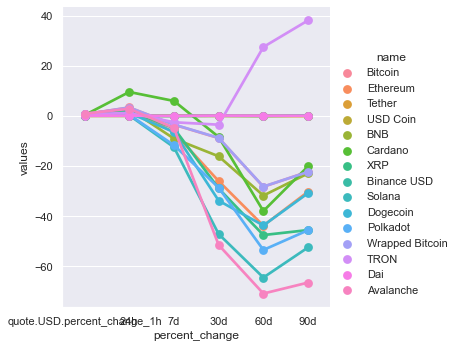

In [75]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [76]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,30506.10923,2022-06-08 06:00:16.497028
15,Bitcoin,30575.17469,2022-06-08 06:09:40.306254
30,Bitcoin,30548.43424,2022-06-08 06:10:41.373226
45,Bitcoin,30547.74147,2022-06-08 06:11:41.847731
60,Bitcoin,30545.88333,2022-06-08 06:12:43.480290
75,Bitcoin,30528.10102,2022-06-08 06:13:44.049833
90,Bitcoin,30427.29593,2022-06-08 06:31:41.148093
105,Bitcoin,30439.32780,2022-06-08 06:32:41.696101
120,Bitcoin,30448.67104,2022-06-08 06:33:42.174787
135,Bitcoin,30506.10923,2022-06-08 06:00:16.497028
